In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = './data/'

In [4]:
df_rain = pd.read_json(path + 'all_rainfall_data.json')

In [5]:
df_rain

,num,typhoon_name,typhoon_cht_name,stno,stntype,accu_end_time,accu_value,statistic_count
0,195813,1958GRACE,葛瑞絲,460010,CWA,1958-09-04 20:00:00,103.2,85
1,195807,1958WINNIE,溫妮,460010,CWA,1958-07-17 08:00:00,144.8,85
2,195917,1959BABS,巴布絲,460010,CWA,1959-10-09 20:00:00,59.7,49
3,195905,1959BILLIE,畢莉,460010,CWA,1959-07-16 14:00:00,102.6,91
4,195921,1959FREDA,芙瑞達,460010,CWA,1959-11-19 20:00:00,302.6,61
...,...,...,...,...,...,...,...,...
6340,200119,2001LEKIMA,利奇馬,467411,CWA,2001-09-28 08:00:00,33.3,109
6341,200116,2001NARI,納莉,467411,CWA,2001-09-19 23:00:00,244.5,154
6342,200108,2001TORAJI,桃芝,467411,CWA,2001-07-31 14:00:00,24.6,82
6343,200105,2001TRAMI,潭美,467411,CWA,2001-07-11 20:00:00,15.0,37


In [6]:
df_price = pd.read_csv(path + '甘藍初秋_台北一日交易行情.csv')

In [9]:
df_price.rename(columns = {'日期':'date', '市場':'market','平均價':'avg_price','交易量(公斤)':'trading_volume'},inplace = True)
df_price

,date,market,產品,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1
0,085/01/01,109 台北一,LA1 甘藍 初秋,12.0,9.0,6.0,8.8,-,"75,779",-
1,085/01/02,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,11.2,27,"58,780",-22
2,085/01/03,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,10.1,-10,"103,999",77
3,085/01/05,109 台北一,LA1 甘藍 初秋,11.0,9.0,7.0,8.1,-,"108,342",-
4,085/01/06,109 台北一,LA1 甘藍 初秋,10.0,8.0,6.0,7.9,-2,"113,928",5
...,...,...,...,...,...,...,...,...,...,...
8781,114/01/07,109 台北一,LA1 甘藍 初秋,20.6,17.4,15.3,17.6,-2,"177,076",30
8782,114/01/08,109 台北一,LA1 甘藍 初秋,18.8,17.8,14.2,17.3,-2,"151,774",-14
8783,114/01/09,109 台北一,LA1 甘藍 初秋,16.2,14.2,11.3,14.0,-19,"163,168",8
8784,114/01/10,109 台北一,LA1 甘藍 初秋,17.3,16.0,14.2,15.9,14,"129,015",-21


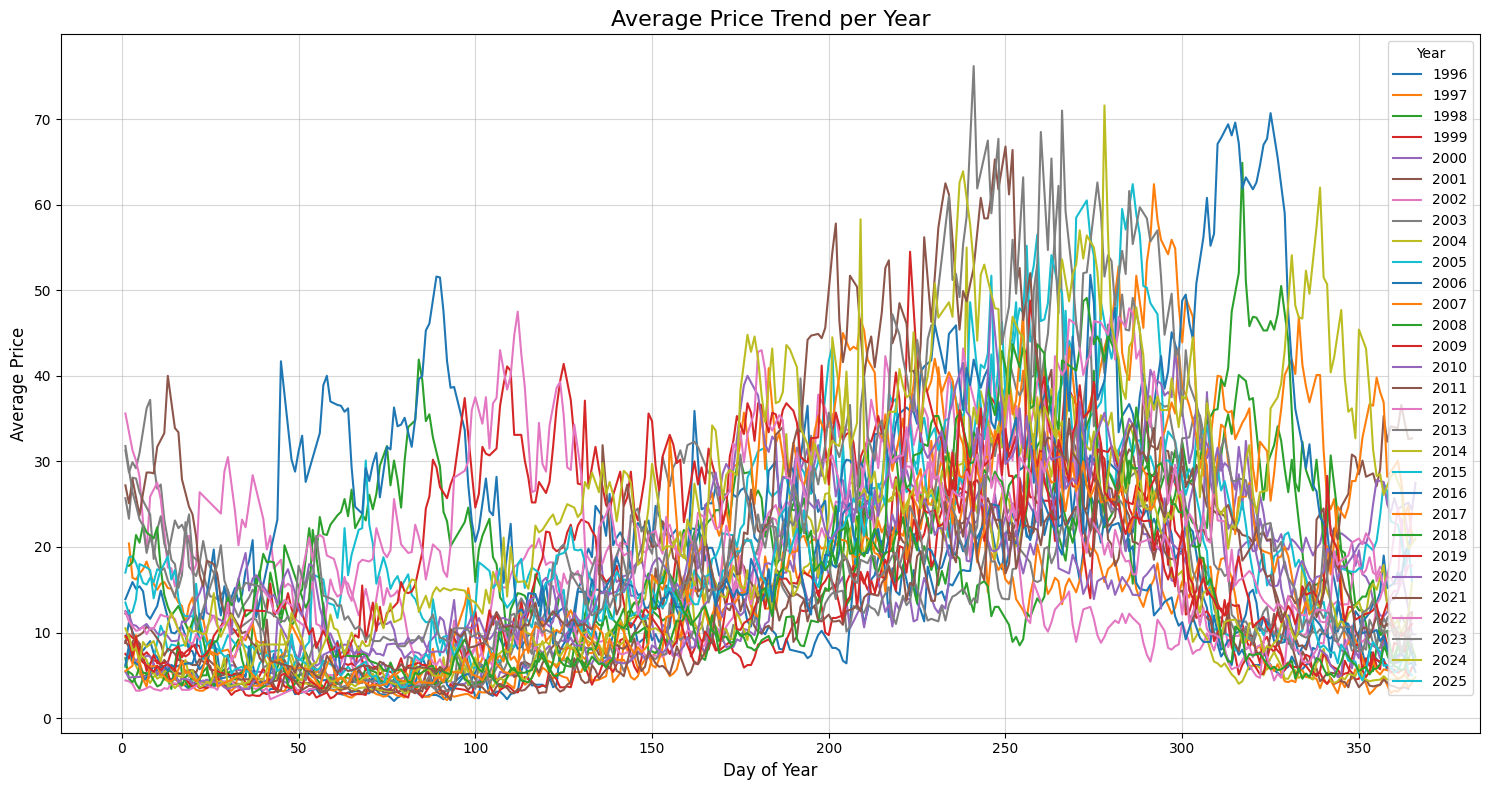

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 新增年份和一年中的天數屬性
df_price['year'] = df_price['date'].dt.year
df_price['day_of_year'] = df_price['date'].dt.dayofyear

# 繪製折線圖
plt.figure(figsize=(15, 8))

for year, group in df_price.groupby('year'):
    # 將日期排序，避免日期順序不正確
    group = group.sort_values(by='date')
    plt.plot(group['day_of_year'], group['avg_price'], label=str(year))

plt.title('Average Price Trend per Year', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()




C:\Users\meowm\AppData\Local\Temp\ipykernel_21556\802901400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_avg['year'] = df_weekly_avg['date'].dt.year
C:\Users\meowm\AppData\Local\Temp\ipykernel_21556\802901400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_avg['week_of_year'] = df_weekly_avg['date'].dt.isocalendar().week


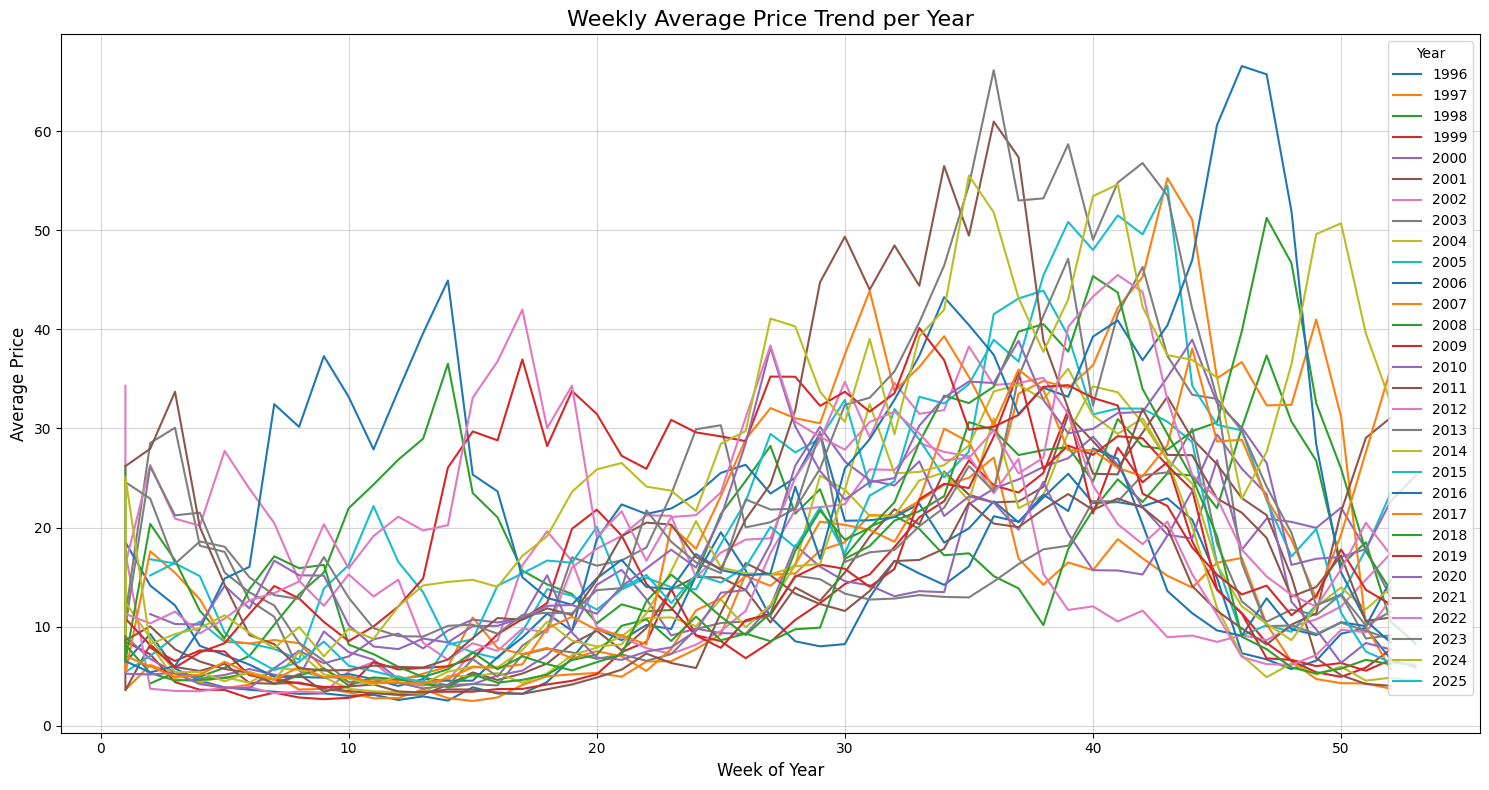

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 選擇數值型欄位進行聚合
numeric_columns = df_price.select_dtypes(include=['number']).columns
weekly_avg = df_price.resample('W-Mon', on='date')[numeric_columns].mean().reset_index()

# 將周平均存入新的 DataFrame
df_weekly_avg = weekly_avg[['date', 'avg_price']]
df_weekly_avg['year'] = df_weekly_avg['date'].dt.year
df_weekly_avg['week_of_year'] = df_weekly_avg['date'].dt.isocalendar().week

# 繪製折線圖
plt.figure(figsize=(15, 8))

for year, group in df_weekly_avg.groupby('year'):
    # 將周數排序，避免順序不正確
    group = group.sort_values(by='week_of_year')
    plt.plot(group['week_of_year'], group['avg_price'], label=str(year))

plt.title('Weekly Average Price Trend per Year', fontsize=16)
plt.xlabel('Week of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()


In [16]:
df_price

,date,market,產品,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1,year,day_of_year
0,1996-01-01,109 台北一,LA1 甘藍 初秋,12.0,9.0,6.0,8.8,-,"75,779",-,1996,1
1,1996-01-02,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,11.2,27,"58,780",-22,1996,2
2,1996-01-03,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,10.1,-10,"103,999",77,1996,3
3,1996-01-05,109 台北一,LA1 甘藍 初秋,11.0,9.0,7.0,8.1,-,"108,342",-,1996,5
4,1996-01-06,109 台北一,LA1 甘藍 初秋,10.0,8.0,6.0,7.9,-2,"113,928",5,1996,6
...,...,...,...,...,...,...,...,...,...,...,...,...
8781,2025-01-07,109 台北一,LA1 甘藍 初秋,20.6,17.4,15.3,17.6,-2,"177,076",30,2025,7
8782,2025-01-08,109 台北一,LA1 甘藍 初秋,18.8,17.8,14.2,17.3,-2,"151,774",-14,2025,8
8783,2025-01-09,109 台北一,LA1 甘藍 初秋,16.2,14.2,11.3,14.0,-19,"163,168",8,2025,9
8784,2025-01-10,109 台北一,LA1 甘藍 初秋,17.3,16.0,14.2,15.9,14,"129,015",-21,2025,10


In [17]:
df_weekly_avg

,date,avg_price,year,week_of_year
0,1996-01-01,8.800000,1996,1
1,1996-01-08,9.260000,1996,2
2,1996-01-15,5.783333,1996,3
3,1996-01-22,4.540000,1996,4
4,1996-01-29,3.866667,1996,5
...,...,...,...,...
1511,2024-12-16,39.583333,2024,51
1512,2024-12-23,32.616667,2024,52
1513,2024-12-30,25.100000,2024,1
1514,2025-01-06,15.166667,2025,2


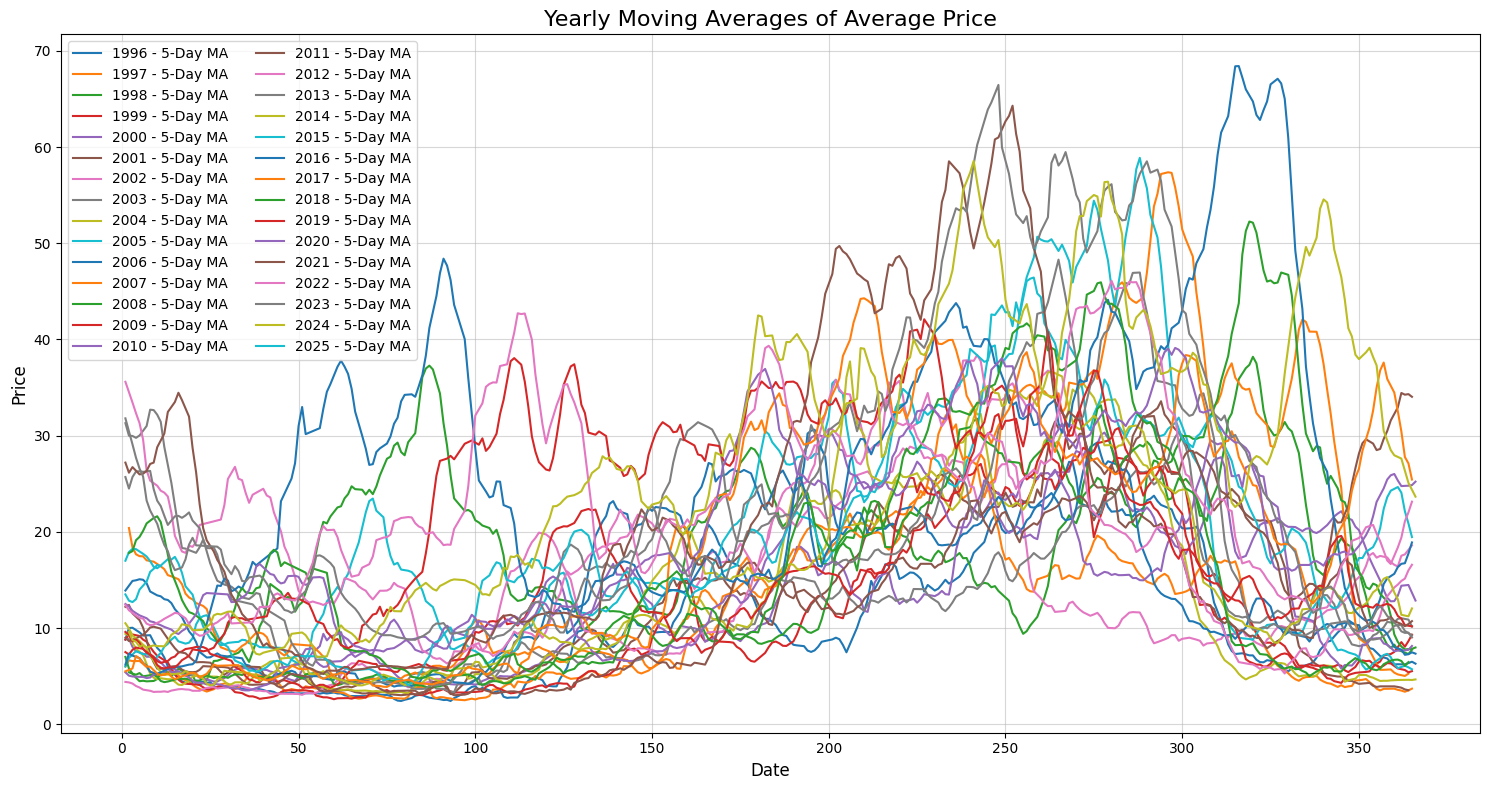

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 計算移動平均 (股市均線風格)
def calculate_moving_average(df, column, window):
    df[f'{column}_ma{window}'] = df[column].rolling(window=window, min_periods=1).mean()
    return df

# 按年計算 5 日、10 日、20 日均線
df_price = df_price.sort_values(by='date')  # 確保日期排序正確
df_price['year'] = df_price['date'].dt.year

ma_dfs = []
for year, group in df_price.groupby('year'):
    group = calculate_moving_average(group, 'avg_price', 5)
    # group = calculate_moving_average(group, 'avg_price', 10)
    # group = calculate_moving_average(group, 'avg_price', 20)
    ma_dfs.append(group)

df_ma = pd.concat(ma_dfs)

# 繪製均線圖
plt.figure(figsize=(15, 8))
for year, group in df_ma.groupby('year'):
    # plt.plot(group['date'], group['avg_price'], label=f'{year} - Avg Price', alpha=0.5)
    plt.plot(group['day_of_year'], group['avg_price_ma5'], label=f'{year} - 5-Day MA')
    # plt.plot(group['date'], group['avg_price_ma10'], label=f'{year} - 10-Day MA')
    # plt.plot(group['date'], group['avg_price_ma20'], label=f'{year} - 20-Day MA')

plt.title('Yearly Moving Averages of Average Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(ncol=2, fontsize=10)
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()


In [20]:
df_ma

,date,market,產品,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1,year,day_of_year,avg_price_ma5
0,1996-01-01,109 台北一,LA1 甘藍 初秋,12.0,9.0,6.0,8.8,-,"75,779",-,1996,1,8.800000
1,1996-01-02,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,11.2,27,"58,780",-22,1996,2,10.000000
2,1996-01-03,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,10.1,-10,"103,999",77,1996,3,10.033333
3,1996-01-05,109 台北一,LA1 甘藍 初秋,11.0,9.0,7.0,8.1,-,"108,342",-,1996,5,9.550000
4,1996-01-06,109 台北一,LA1 甘藍 初秋,10.0,8.0,6.0,7.9,-2,"113,928",5,1996,6,9.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,2025-01-07,109 台北一,LA1 甘藍 初秋,20.6,17.4,15.3,17.6,-2,"177,076",30,2025,7,14.820000
8782,2025-01-08,109 台北一,LA1 甘藍 初秋,18.8,17.8,14.2,17.3,-2,"151,774",-14,2025,8,15.840000
8783,2025-01-09,109 台北一,LA1 甘藍 初秋,16.2,14.2,11.3,14.0,-19,"163,168",8,2025,9,16.160000
8784,2025-01-10,109 台北一,LA1 甘藍 初秋,17.3,16.0,14.2,15.9,14,"129,015",-21,2025,10,16.560000
